### Importing libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan.csv')

### Exploratory data analysis

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.drop('Loan_ID',axis=1,inplace=True)

In [5]:
df.shape

(614, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.isnull().sum()
# We can see null values here

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Null values imputation

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])



In [10]:
df.isnull().sum()
# We can see now there is no null value

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

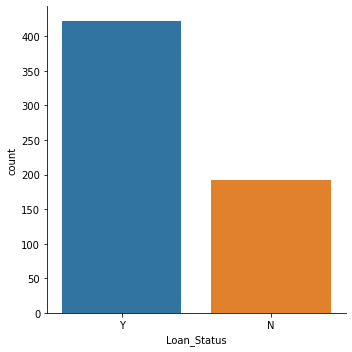

In [11]:
sns.catplot(x='Loan_Status',data=df,kind='count')


In [12]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


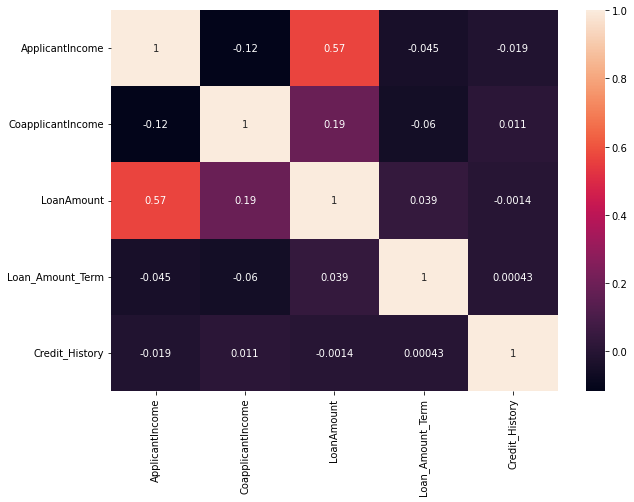

In [14]:
# We can see the correlations of continuous values to our dependant variable
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Separating dependant and independant variables

In [15]:
X=df.drop('Loan_Status',axis=1).values
y=df.Loan_Status.values

### Label encoding for categorical variables

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])
X[:,10]=le.fit_transform(X[:,10])
y=le.fit_transform(y)

In [17]:
X

array([[1, 0, 0, ..., 360.0, 1.0, 2],
       [1, 1, 1, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 1, ..., 360.0, 1.0, 2],
       [1, 1, 2, ..., 360.0, 1.0, 2],
       [0, 0, 0, ..., 360.0, 0.0, 1]], dtype=object)

In [18]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

### Train-test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_hat))
print("f1-score:",f1_score(y_test,y_hat))

accuracy_score: 0.7886178861788617
f1-score: 0.8586956521739131


### Fitting support vector classifier

In [22]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(X_train,y_train)
y_hat1=sc.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_hat1))
print("f1-score:",f1_score(y_test,y_hat1))


accuracy_score: 0.7804878048780488
f1-score: 0.8524590163934427


### Fitting random forest classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat2=rc.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_hat2))
print("f1-score:",f1_score(y_test,y_hat2))

accuracy_score: 0.7967479674796748
f1-score: 0.861878453038674


### Fitting decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
sc.fit(X_train,y_train)
y_hat3=sc.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_hat3))
print("f1-score:",f1_score(y_test,y_hat3))

accuracy_score: 0.7804878048780488
f1-score: 0.8524590163934427


#### We can use any of the above algorithm as they give almost same accuracy